<a href="https://colab.research.google.com/github/0701Vatsal/ML_Practicals/blob/main/diabetes_prediction_with_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using KNN Algorithm to predict if a person will have diabetes or not

### importing libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from google.colab import files
uploaded=files.upload()

Saving diabetes.csv to diabetes.csv


### loading the dataset

In [3]:
data = pd.read_csv('diabetes.csv')

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,78,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,70,35,168,43.1,2.288,33,1


#### Replace columns like [Gluscose,BloodPressure,SkinThickness,BMI,Insulin] with Zero as values with mean of respective column

In [5]:
zero_not_accepted = ['Glucose','BloodPressure','SkinThickness','BMI','Insulin']

for col in zero_not_accepted:
    data[col]= data[col].replace(0,np.NaN)
    mean = int(data[col].mean(skipna=True))
    data[col] = data[col].replace(np.NaN,mean)


### extracting independent variables

In [6]:
X = data.iloc[:,0:8]

### extracting dependent variable

In [7]:
y = data.iloc[:,8]

### Explorning data to know relation before processing

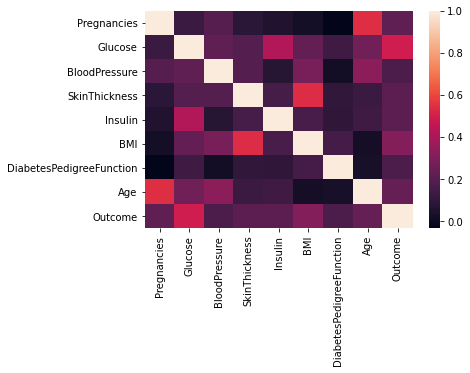

In [8]:
sns.heatmap(data.corr())

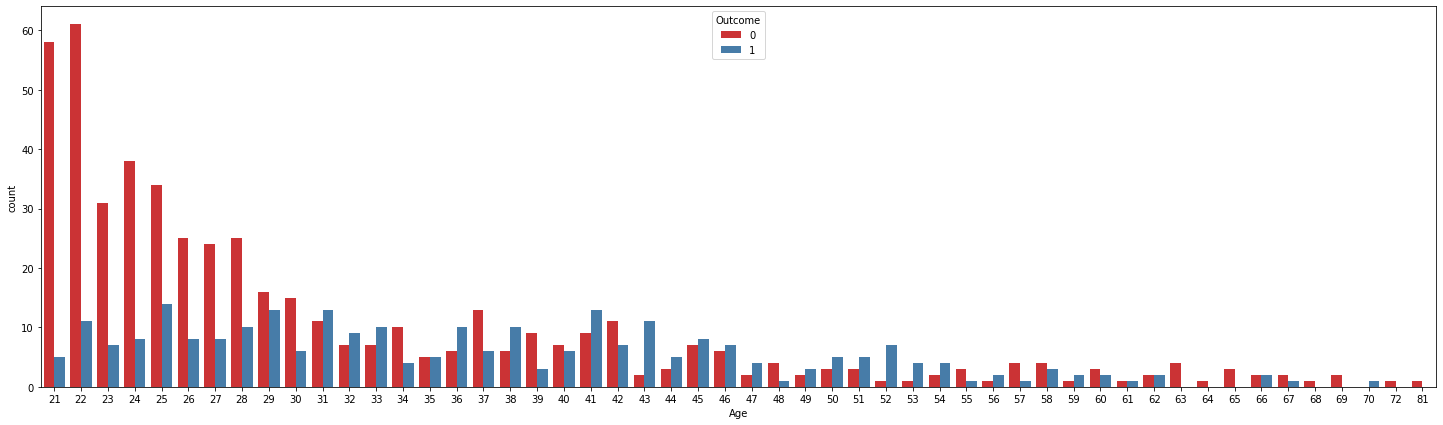

In [9]:
plt.figure(figsize=(25,7))
sns.countplot(x='Age',hue='Outcome',data=data,palette='Set1')

### splitting dataset into training and testing set

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


 ### feature scaling

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### loading model - KNN

In [12]:
classifier = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')

### fitting model

In [13]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

### making predictions

In [14]:
y_pred = classifier.predict(X_test)

### evaluating model

In [15]:
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)
print(f1_score(y_test,y_pred))


[[94 13]
 [15 32]]
0.6956521739130436


### accuracy


In [16]:
print(accuracy_score(y_test,y_pred))

0.8181818181818182
